In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Car_Data.csv")  # Ensure the file name matches
df.head()

Saving Car_Data.csv to Car_Data.csv


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check dataset info
df.info()

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:

# Convert categorical variables (Fuel_Type, Selling_type, Transmission) to numerical values
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Convert "Year" to car age
df['Car_Age'] = 2025 - df['Year']
df.drop(columns=['Year', 'Car_Name'], inplace=True)  # Drop unnecessary columns

In [5]:

# Define independent (X) and dependent (y) variables
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

In [7]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In [8]:

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))

# Evaluate models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Model: Linear Regression
MAE: 1.2163740193330348
MSE: 3.481349830511814
RMSE: 1.8658375680942363
R2 Score: 0.8488707839193156

Model: Random Forest Regressor
MAE: 0.636781967213115
MSE: 0.9246533109836059
RMSE: 0.9615889511551211
R2 Score: 0.9598597851871676


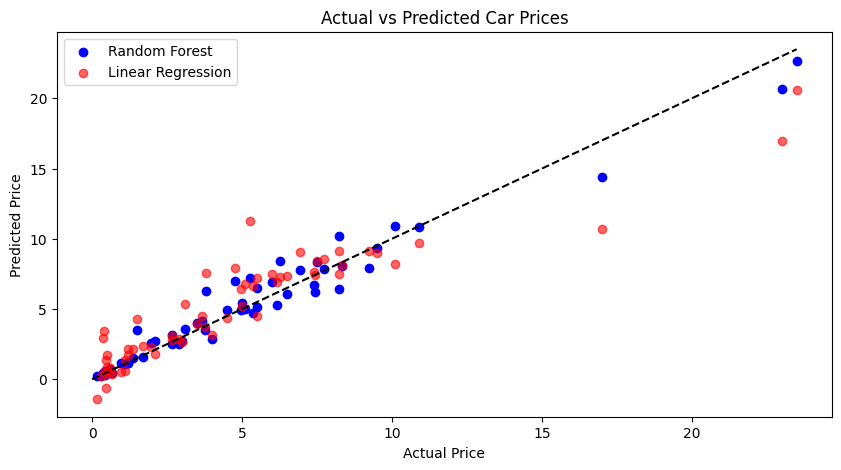

In [9]:

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color="blue", label="Random Forest")
plt.scatter(y_test, y_pred_lr, color="red", label="Linear Regression", alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color="black", linestyle="--")  # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()